# Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this portfolio project, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

You will also create a presentation about your findings from this OKCupid dataset.

## Project Goal
We will investigate the OKCupid data using machine learning models. We will use
- A regression related model
- A classification related model

After looking over the dataset, I am going to pick three main questions to explore.

**1. Can habits, beliefs, & preferences be used to predict someone's astrological sign?**

**2. Can education and location be used to predict income?**

### Data
We will be using `profiles.csv` as the dataset for this project. More details about the data will be written upon investigation.

Clarifications of the dataset columns can be found here `https://www.kaggle.com/andrewmvd/okcupid-profiles`
Source can be found at `https://www.tandfonline.com/doi/abs/10.1080/10691898.2015.11889737`

### Analysis
We will be using descriptive statistics and graphical visualization to perform some exploratory data analysis. 

### Evaluation
We will score our machine learning model.

## Step 1: Understanding the dataset & Decide Questions

#### Importing python modules

In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [541]:
profiles = pd.read_csv('profiles.csv')
print(profiles.columns)
profiles.head()

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


,age,body_type,diet,drinks,drugs,education,essay0,...,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,...,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,...,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...",...,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,...,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,...,likes dogs and likes cats,NaN,m,aquarius,no,english,single


#### Variables

The data came in three major types

**1. Basic Info**
    - age [continuous]
    - last_online [continuous]
    - orientation [categorical, nominal]
    - sex [categorical, nominal]
    - sign [categorical, nominal]
    - status [categorical, ordinal]
**2. Appearance**

    - age (While age is basic info, it is directly related to appearance)
    - body_type [categorical, ordinal]
    - ethnicity [categorical, nominal]
    - height [continuous]
**3. Background**
    - education [categorical, nominal]
    - income [continuous]
    - job [categorical, nominal]
    - location [categorical, nominal]
**4. Habits, Beliefs, & Preferences**
    - diet [categorical, nominal]
    - drinks [categorical, ordinal]
    - drugs [categorical, ordinal]
    - offspring [cateogrical, ordinal]
    - pets [categorical, nominal]
    - religion [categorical, nominal & categorical] (could be categorical because it adds seriousness)
    - smokes [categorical, ordinal]
    - speaks [categorical, nominal]
**5. Essays**
    - essay0 - essay9
**(Clarifications on essay topics)**
- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…
    

For the sake of easier categorization later on, I'm going to store these classifications in a few variables

In [542]:
basic_info = ['age', 'last_online', 'orientation', 'sex', 'sign', 'sstatus']
appearance = ['age', 'body_type', 'ethnicity', 'height']
background = ['education', 'income', 'job', 'location']
habits_beliefs_preferences = ['diet', 'drinks', 'drugs', 'job', 'offspring', 'pets', \
                              'religion', 'smokes', 'speaks']
essays = ['essay' + str(i) for i in range(10)]


In [543]:
print(profiles.smokes.unique())
print(profiles.education.unique())

['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out of space camp'
 'graduated from ph.d program' 'graduated from law school'
 'working on ph.d program' 'two-year college'
 'graduated from two-year college' 'working on med school'
 'dropped out of college/university' 'space camp'
 'graduated from med school' 'dropped out of high school'
 'working on high school' 'masters program' 'dropped out of ph.d program'
 'dropped out of two-year college' 'dropped out of med school'
 'high school' 'working on law school' 'law school'
 'dropped out of masters program' 'ph.d program'
 'dropped out of law school' 'med school']


#### Selecting Questiosn to Explore

After looking over the dataset, I am going to pick three main questions to explore.
1. Can habits, beliefs, & preferences be used to predict someone's astrological sign?
2. Can education and location be used to predict income?

## Step 2: Exploratory Data Analysis

#### Selecting the Right Columns

We obviously don't have to explore every single field given. We will find the variables pertinent to the questions and explore them. 

### Question 1: Can habits, beliefs, & preferences be used to predict someone's astrological sign?

We will explore the `sign` column and the columns that fall under `habits_beliefs_preferences`, as I classified earlier.

In [544]:
df1 = profiles[habits_beliefs_preferences + ['sign']]
df1.head()

,diet,drinks,drugs,job,offspring,pets,religion,smokes,speaks,sign
0,strictly anything,socially,never,transportation,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,sometimes,english,gemini
1,mostly other,often,sometimes,hospitality / travel,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,no,"english (fluently), spanish (poorly), french (...",cancer
2,anything,socially,NaN,NaN,NaN,has cats,NaN,no,"english, french, c++",pisces but it doesn&rsquo;t matter
3,vegetarian,socially,NaN,student,doesn&rsquo;t want kids,likes cats,NaN,no,"english, german (poorly)",pisces
4,NaN,socially,never,artistic / musical / writer,NaN,likes dogs and likes cats,NaN,no,english,aquarius


#### Distribution of signs

As seen, for each sign, there is "it doesn't matter", "it matters a lot", and "it's fun to think about". Therefore, we are gonna create a new dataframe that seperates signs and importance.

To rate the importance, we are going to do
- 1: doesn't matter
- 2: doesn't say
- 3: fun to think about
- 4: matters a lot

In [545]:
# Since first word is always sign, we are going to do that
df_sign = df1[['sign']]
print(len(df_sign))
df_sign = df_sign.dropna()

def find_importance(x):
    if (x.find(' ') == -1):
        return 'not clear'
    else:
        loc = x.find(' ')
        loc+=4    # cuz 'and' and 'but' are both 3 characters
        return x[loc:]
    
find_importance2 = lambda D: \
            D[((D).find(' ') + 4):]

59946


In [546]:

df_sign['importance'] = df_sign['sign'].apply(find_importance)


print(df_sign.importance.unique())
df_sign.importance = df_sign.importance.map({'not clear': 'not clear', \
                        ' it doesn&rsquo;t matter': 'doesn\'t matter', \
                        ' it&rsquo;s fun to think about': 'fun to think about', \
                       ' it matters a lot': 'matters a lot'})
print(df_sign.importance.unique())
df_sign['original_text'] = df_sign.sign[:]
df_sign.head()

['not clear' ' it doesn&rsquo;t matter' ' it&rsquo;s fun to think about'
 ' it matters a lot']
['not clear' "doesn't matter" 'fun to think about' 'matters a lot']


,sign,importance,original_text
0,gemini,not clear,gemini
1,cancer,not clear,cancer
2,pisces but it doesn&rsquo;t matter,doesn't matter,pisces but it doesn&rsquo;t matter
3,pisces,not clear,pisces
4,aquarius,not clear,aquarius


In [547]:
df_sign.sign = df_sign.sign.apply(lambda x: x if ' ' not in x else x[:(x.find(' '))])

df_sign.head(20)

,sign,importance,original_text
0,gemini,not clear,gemini
1,cancer,not clear,cancer
2,pisces,doesn't matter,pisces but it doesn&rsquo;t matter
3,pisces,not clear,pisces
4,aquarius,not clear,aquarius
...,...,...,...
16,pisces,doesn't matter,pisces but it doesn&rsquo;t matter
17,aries,fun to think about,aries and it&rsquo;s fun to think about
18,libra,doesn't matter,libra but it doesn&rsquo;t matter
19,pisces,fun to think about,pisces and it&rsquo;s fun to think about


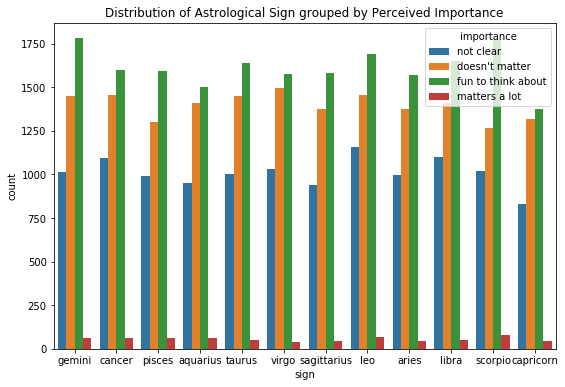

In [548]:
f, ax = plt.subplots(figsize = (9, 6))
sns.countplot(x = df_sign.sign, hue = df_sign.importance)
plt.title('Distribution of Astrological Sign grouped by Perceived Importance')
plt.show()

       sign      importance                       original_text
0    gemini       not clear                              gemini
1    cancer       not clear                              cancer
2    pisces  doesn't matter  pisces but it doesn&rsquo;t matter
3    pisces       not clear                              pisces
4  aquarius       not clear                            aquarius


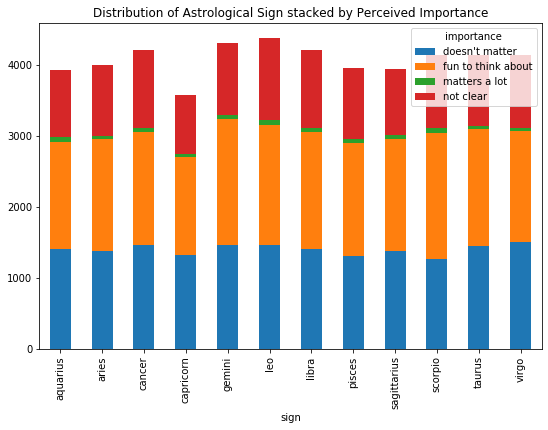

In [549]:
# Make a crosstab
title = 'Distribution of Astrological Sign stacked by Perceived Importance'
df_sign_xtab = pd.crosstab(df_sign.sign, df_sign.importance)
print(df_sign.head())

df_sign_xtab.plot(kind = 'bar', stacked = True, figsize = (9, 6), title = title)

#### Analysis of Distribution of Signs
As can be seen, the signs are roughly evenly distributed. Regarding importance, very few people are taking astrology too seriously, while there's a roughly equal amount of people not caring vs. thinking it's fun to think about.

### Question 2: Can education and location be used to predict income?

To observe this question, we are going to analyze the distribution of `education`, `location`, and `income`

In [550]:
df2 = profiles[background]
df2.head()

,education,income,job,location
0,working on college/university,-1,transportation,"south san francisco, california"
1,working on space camp,80000,hospitality / travel,"oakland, california"
2,graduated from masters program,-1,NaN,"san francisco, california"
3,working on college/university,20000,student,"berkeley, california"
4,graduated from college/university,-1,artistic / musical / writer,"san francisco, california"


####  Distribution of education

Since the dataframe format was similar to the astrological sign, we are going to pivot the table in a similar way. We will group the institutions together, e.g. college, highschool, etc. Then we will creat a 'status' column to show if the person has graduated, dropped out, etc. 

In [551]:
df_education = df2[['education']]
df_education.dropna(inplace = True)
print(df_education.education.unique())

['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out of space camp'
 'graduated from ph.d program' 'graduated from law school'
 'working on ph.d program' 'two-year college'
 'graduated from two-year college' 'working on med school'
 'dropped out of college/university' 'space camp'
 'graduated from med school' 'dropped out of high school'
 'working on high school' 'masters program' 'dropped out of ph.d program'
 'dropped out of two-year college' 'dropped out of med school'
 'high school' 'working on law school' 'law school'
 'dropped out of masters program' 'ph.d program'
 'dropped out of law school' 'med school']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [552]:
def find_edu_status(x):
    if 'graduated' in x:
        return 'graduated'
    elif 'working' in x:
        return 'in process'
    elif 'dropped' in x:
        return 'dropped out'
    else:
        return 'unspecified'

In [553]:
df_education['status'] = df_education.education.apply(find_edu_status)
df_education.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,education,status
0,working on college/university,in process
1,working on space camp,in process
2,graduated from masters program,graduated
3,working on college/university,in process
4,graduated from college/university,graduated


In [554]:
def find_edu_institution(x):
    if (('working' in x) or ('graduated' in x)):
        return ' '.join(x.split()[2:])
    elif ('dropped' in x):
        return ' '.join(x.split()[3:])
    else:
        return x

In [555]:
df_education['original_text'] = df_education['education']
df_education.education = df_education.education.apply(find_edu_institution)
print(df_education.education.unique())

['college/university' 'space camp' 'masters program' 'two-year college'
 'high school' 'ph.d program' 'law school' 'med school']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


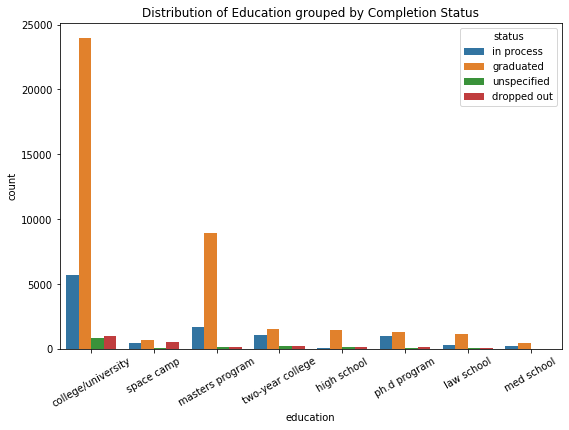

In [556]:
f, ax = plt.subplots(figsize = (9, 6))
sns.countplot(x = df_education.education, hue = df_education.status)
plt.title('Distribution of Education grouped by Completion Status')
plt.xticks(rotation = 30)
plt.show()

status              dropped out  graduated  in process  unspecified
education                                                          
college/university     0.031620   0.761401    0.181524     0.025455
high school            0.059545   0.833625    0.050788     0.056042
law school             0.012605   0.785714    0.188375     0.013305
masters program        0.012821   0.820604    0.154121     0.012454
med school             0.017621   0.654919    0.311307     0.016153
ph.d program           0.052741   0.528239    0.408223     0.010797
space camp             0.310755   0.390374    0.264409     0.034462
two-year college       0.063287   0.507290    0.355865     0.073559


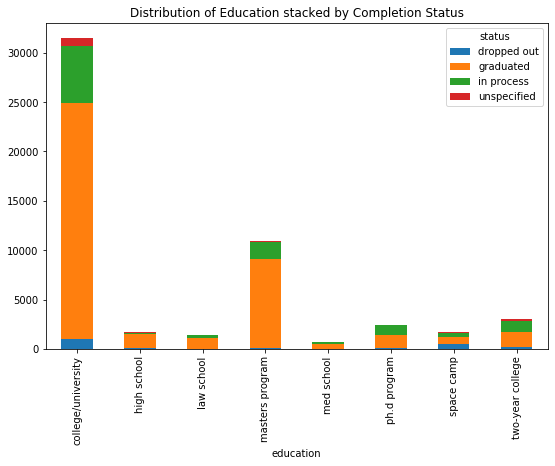

In [557]:
# Make a crosstab
title = 'Distribution of Education stacked by Completion Status'
df_education_xtab = pd.crosstab(df_education.education, df_education.status)
print(df_education_xtab.apply(lambda r: r/r.sum(), axis=1))

df_education_xtab.plot(kind = 'bar', stacked = True, figsize = (9, 6), title = title)

#### Analysis of Distribution of Education

College / University take up a notably higher proportion than other educaiton institutions, with masters program being second, followed by two-year colleges and phd programs. 

As seen, most of the users are graduated, while roughly 20% of users are in process for each instiution. This can reflect the age of the user group as well.

#### Distribution of Location

This should be easier to analyze. We are going to use a simple bar chart. Since the data is a little too specific for visualization, we are going to omit the state and only graph the state / country.

In [558]:
print(df2.location.unique())

['south san francisco, california' 'oakland, california'
 'san francisco, california' 'berkeley, california'
 'belvedere tiburon, california' 'san mateo, california'
 'daly city, california' 'san leandro, california' 'atherton, california'
 'san rafael, california' 'walnut creek, california'
 'menlo park, california' 'belmont, california' 'san jose, california'
 'palo alto, california' 'emeryville, california' 'el granada, california'
 'castro valley, california' 'fairfax, california'
 'mountain view, california' 'burlingame, california'
 'martinez, california' 'pleasant hill, california' 'hayward, california'
 'alameda, california' 'vallejo, california' 'benicia, california'
 'el cerrito, california' 'mill valley, california' 'richmond, california'
 'redwood city, california' 'el sobrante, california'
 'stanford, california' 'san pablo, california' 'novato, california'
 'pacifica, california' 'lafayette, california'
 'half moon bay, california' 'fremont, california' 'orinda, californi

In [559]:
df_location_state = df2[['location']].loc[:]
df_location_state['original_text'] = df_location_state.location
df_location_state.location = df_location_state.location.apply\
            (lambda x: x[(x.find(',') + 2) : ])
print(df_location_state.location.unique())


df_location_state.rename(columns = {'location': 'state'}, inplace = True)
print(df_location_state.columns)
df_location_state.head()

['california' 'colorado' 'new york' 'oregon' 'arizona' 'hawaii' 'montana'
 'wisconsin' 'virginia' 'spain' 'nevada' 'illinois' 'vietnam' 'ireland'
 'louisiana' 'michigan' 'texas' 'united kingdom' 'massachusetts'
 'north carolina' 'idaho' 'mississippi' 'new jersey' 'florida' 'minnesota'
 'georgia' 'utah' 'washington' 'west virginia' 'connecticut' 'tennessee'
 'rhode island' 'district of columbia' 'british columbia, canada'
 'missouri' 'germany' 'pennsylvania' 'netherlands' 'switzerland' 'mexico'
 'ohio']
Index(['state', 'original_text'], dtype='object')


,state,original_text
0,california,"south san francisco, california"
1,california,"oakland, california"
2,california,"san francisco, california"
3,california,"berkeley, california"
4,california,"san francisco, california"


In [560]:
#df_location_state_groupby = df_location_state.groupby('state')

df_location_state_pivot = df_location_state.pivot_table(index = 'state', \
                                                  values = 'original_text', aggfunc = 'count')

df_location_state_pivot

,original_text
state,
arizona,3
"british columbia, canada",1
california,59855
colorado,2
connecticut,1
...,...
vietnam,1
virginia,2
washington,2


         state       original_text
1336  colorado   boulder, colorado
2819  new york  new york, new york
4332    oregon    portland, oregon
6728    oregon    portland, oregon
6881   arizona     tucson, arizona


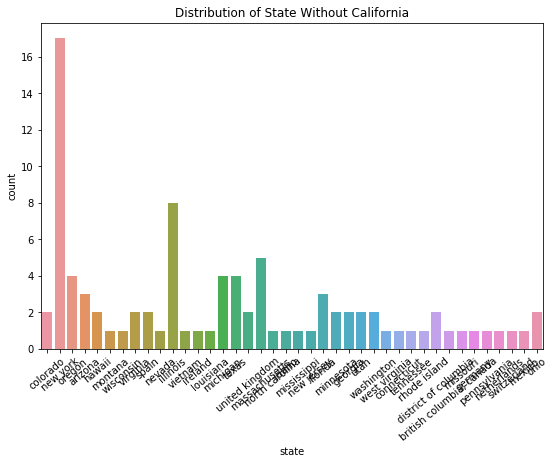

In [561]:
f, ax = plt.subplots(figsize = (9, 6))
df_location_state_noca = df_location_state[df_location_state.state != 'california']
print(df_location_state_noca.head())
sns.countplot(df_location_state_noca.state)
plt.title('Distribution of State Without California')
plt.xticks(rotation = 40)
plt.show()

#### Analysis of Distribution of Location

Obviously, Califiornia has the most users. Perhaps it has to do with how the data is collected. After eliminating California, we can see that many states have single digit counts. I conjecture that this data is taken in California, so an overwhelming majority of respondents are from California.

This tells us that location will not be such a useful feature in our ML model. We have too few samples for other states to generate any statistical significance.

#### Distribution of Income

Since income is continuous data, it is a lot easier to plot. We can use a histogram.

However, note that many users have income of -1. This dataset is not given with much explanation, but I'm assuming it means the user did not fill in a value. I confirmed this after checking that there is no NaN value in income.

In [562]:
# Brief summary statistics
print(df2.income.describe())

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64


In [563]:
df_income = df2[['income']][:]
print(len(df_income))
df_income.dropna()
print(len(df_income))

59946
59946


In [564]:
print(len(df_income[df_income.income != -1]))

11504


Note that the code above showed that only 11504 out of 59946 people chose to fill in their income.

In [565]:
df_income_filled = df_income[df_income.income!= -1]
print(df_income_filled.describe())
df_income_filled.head()

               income
count    11504.000000
mean    104394.993046
std     201433.528307
min      20000.000000
25%      20000.000000
50%      50000.000000
75%     100000.000000
max    1000000.000000


,income
1,80000
3,20000
11,40000
13,30000
14,50000


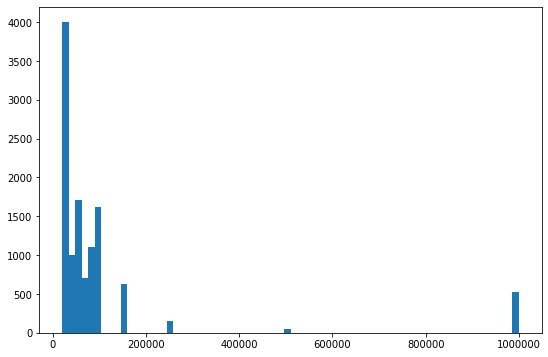

In [566]:
f, ax = plt.subplots(figsize = (9, 6))
plt.hist(df_income_filled.income, bins = 70)
plt.show()

#### Analysis of Distribution of Income

As seen, half of the people have income from 20000 to 50000, and 75% have income below 100000. However, we get about 500 users with income at 10000000. The distribution is certainly right skewed.

Also note that almost 80% of the users chose not to fill out the income.

### Step 3: Data Preprocessing and Preparation

### Question 1: Can habits, beliefs, & preferences be used to predict someone's astrological sign?

We have `habits, beliefs, & preferences` as the features, and `sign` as the labels. Since this is a clsssification with categorical variables, we gotta make sure to change some of those to dummies.

#### Label: Astrological Sign

Recall that we have an almost preprocessed dataset. We are going to make the classification simple and ignore importance.

In [567]:
df_sign

,sign,importance,original_text
0,gemini,not clear,gemini
1,cancer,not clear,cancer
2,pisces,doesn't matter,pisces but it doesn&rsquo;t matter
3,pisces,not clear,pisces
4,aquarius,not clear,aquarius
...,...,...,...
59941,cancer,fun to think about,cancer and it&rsquo;s fun to think about
59942,leo,doesn't matter,leo but it doesn&rsquo;t matter
59943,sagittarius,doesn't matter,sagittarius but it doesn&rsquo;t matter
59944,leo,fun to think about,leo and it&rsquo;s fun to think about


In [568]:
q1_label = df_sign[['sign']]
print(q1_label.sign.isna().sum())
print(len(df_sign))
q1_label.head()

0
48890


,sign
0,gemini
1,cancer
2,pisces
3,pisces
4,aquarius


#### Feature: Habits, Beliefs & Preferences

Earlier we have craeted a `df1` with the related columns. Let's take a look at that.

In [569]:
print(df1.columns)
df1.head()

Index(['diet', 'drinks', 'drugs', 'job', 'offspring', 'pets', 'religion',
       'smokes', 'speaks', 'sign'],
      dtype='object')


,diet,drinks,drugs,job,offspring,pets,religion,smokes,speaks,sign
0,strictly anything,socially,never,transportation,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,sometimes,english,gemini
1,mostly other,often,sometimes,hospitality / travel,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,no,"english (fluently), spanish (poorly), french (...",cancer
2,anything,socially,NaN,NaN,NaN,has cats,NaN,no,"english, french, c++",pisces but it doesn&rsquo;t matter
3,vegetarian,socially,NaN,student,doesn&rsquo;t want kids,likes cats,NaN,no,"english, german (poorly)",pisces
4,NaN,socially,never,artistic / musical / writer,NaN,likes dogs and likes cats,NaN,no,english,aquarius


In [570]:
# we gotta drop the ones with nan as signs to keep it consistent with the feature dataframe
hbp = df1.drop(columns = ['speaks'])
hbp.dropna(subset = ['sign'], inplace = True)

hbp.drop(columns = ['sign'], inplace = True)
print(hbp.isna().sum())
print(len(hbp))
hbp

diet         18770
drinks        1526
drugs        11333
job           4961
offspring    27852
pets         13718
religion     14130
smokes        3604
dtype: int64
48890


,diet,drinks,drugs,job,offspring,pets,religion,smokes
0,strictly anything,socially,never,transportation,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,sometimes
1,mostly other,often,sometimes,hospitality / travel,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,no
2,anything,socially,NaN,NaN,NaN,has cats,NaN,no
3,vegetarian,socially,NaN,student,doesn&rsquo;t want kids,likes cats,NaN,no
4,NaN,socially,never,artistic / musical / writer,NaN,likes dogs and likes cats,NaN,no
...,...,...,...,...,...,...,...,...
59941,NaN,socially,never,sales / marketing / biz dev,has kids,has dogs,catholicism but not too serious about it,no
59942,mostly anything,often,sometimes,entertainment / media,doesn&rsquo;t have kids,likes dogs and likes cats,agnosticism,no
59943,mostly anything,not at all,never,construction / craftsmanship,doesn&rsquo;t have kids,NaN,christianity but not too serious about it,no
59944,mostly anything,socially,often,medicine / health,"doesn&rsquo;t have kids, but wants them",likes dogs and likes cats,agnosticism but not too serious about it,trying to quit


There are quite a few null values. Let's think about what to fill in.

- For diet, we can assume generally that no response means the user doesn't care much, so it's an anything.
- For drinks and drugs, we can call it 'not disclosed'. It also tells a lot about a person's habits.
- For offspring, similarly, we can call it 'no plans yet'
- For pets, we can assume it means doesn't have any pets, and no preferences. (Note the pet column should be cleaned a bit more).
- For religion and smoke, simialry, 'not disclosed'
- For speaks, let's just drop them since it's only 50.

After careful consideration, I'm going to drop; the entire `speaks` column. For two reasons.
1. Language shows more of where you are from, and not exactly part of lifestyle.
2. This data is too hard to clean, and once made into dummy variables, are going to create a hundred or so columns.

In [571]:
print(hbp.diet.unique())
hbp.diet.fillna('anything', inplace = True)
hbp.drinks.fillna('not disclosed', inplace = True)
hbp.drugs.fillna('not disclosed', inplace = True)
hbp.offspring.fillna('unplanned yet', inplace = True)
hbp.pets.fillna('not disclosed', inplace = True)
hbp.religion.fillna('not disclosed', inplace = True)
hbp.smokes.fillna('not disclosed', inplace = True)
hbp.job.fillna('not disclosed', inplace = True)

print(len(hbp))


['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
48890


#### Cleaning the religion column
Let's preprocess the religion column, as having too many subcategories affects classificaiton.

In [572]:
print(hbp.religion.unique())
print(hbp.religion.value_counts())

['agnosticism and very serious about it'
 'agnosticism but not too serious about it' 'not disclosed' 'atheism'
 'christianity' 'christianity but not too serious about it'
 'atheism and laughing about it' 'christianity and very serious about it'
 'other' 'catholicism' 'catholicism but not too serious about it'
 'catholicism and somewhat serious about it'
 'agnosticism and somewhat serious about it'
 'catholicism and laughing about it' 'agnosticism and laughing about it'
 'agnosticism' 'atheism and somewhat serious about it'
 'buddhism but not too serious about it'
 'other but not too serious about it' 'other and laughing about it'
 'buddhism and laughing about it' 'other and somewhat serious about it'
 'other and very serious about it' 'hinduism but not too serious about it'
 'atheism but not too serious about it' 'judaism'
 'christianity and somewhat serious about it' 'buddhism'
 'judaism but not too serious about it'
 'hinduism and very serious about it' 'judaism and laughing about it

In [573]:
hbp['religion_cleaned'] = hbp.religion.apply(lambda x:\
                                            x.split()[0] if x != 'not disclosed' else x)

In [574]:
print(hbp.pets.unique())


['likes dogs and likes cats' 'has cats' 'likes cats' 'not disclosed'
 'likes dogs and has cats' 'likes dogs and dislikes cats' 'has dogs'
 'has dogs and dislikes cats' 'has dogs and likes cats' 'likes dogs'
 'has dogs and has cats' 'dislikes dogs and has cats'
 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs']


#### Cleaning the pets column

Since the pets columns are a bit messy, let's clean it. The statuses can be summed up to:
- likes dogs
- has dogs
- likes cats
- has cats
- dislikes dogs
- dislikes cats
- not disclosed
Let's set these as dummy variables and clean it up.

In [575]:
hbp['likes_dogs'] = hbp.pets.apply\
    (lambda x: 1 if ('likes dogs' in x and 'dislikes' not in x) else 0)
hbp['likes_cats'] = hbp.pets.apply\
    (lambda x: 1 if ('likes cats' in x and 'dislikes' not in x) else 0)
hbp['has_dogs'] = hbp.pets.apply\
    (lambda x: 1 if ('has dogs' in x) else 0)
hbp['has_cats'] = hbp.pets.apply\
    (lambda x: 1 if ('has cats' in x) else 0)
hbp['dislikes_dogs'] = hbp.pets.apply\
    (lambda x: 1 if ('dislikes dogs' in x) else 0)
hbp['dislikes_cats'] = hbp.pets.apply\
    (lambda x: 1 if ('dislikes_cats' in x) else 0)
hbp['pet_not_disclosed'] = hbp.pets.apply\
    (lambda x: 1 if ('not_disclosed' in x) else 0)
print(len(hbp))
hbp.head()[['pets', 'likes_dogs', 'likes_cats', 'has_dogs', 'has_cats', 'dislikes_dogs', \
             'dislikes_cats', 'pet_not_disclosed']]


48890


,pets,likes_dogs,likes_cats,has_dogs,has_cats,dislikes_dogs,dislikes_cats,pet_not_disclosed
0,likes dogs and likes cats,1,1,0,0,0,0,0
1,likes dogs and likes cats,1,1,0,0,0,0,0
2,has cats,0,0,0,1,0,0,0
3,likes cats,0,1,0,0,0,0,0
4,likes dogs and likes cats,1,1,0,0,0,0,0


Now it's time to set dummy variables for the rest

In [576]:
cols = ['diet', 'drinks', 'drugs', 'job', 'offspring', 'religion_cleaned', 'smokes']
q1_feature = hbp.drop(columns = 'pets')

for col in cols:
    q1_feature = pd.get_dummies(q1_feature, columns = [col], prefix = [col])
q1_feature.drop(columns = ['religion'], inplace = True)
q1_feature.head()

,likes_dogs,likes_cats,has_dogs,has_cats,dislikes_dogs,dislikes_cats,pet_not_disclosed,...,religion_cleaned_other,smokes_no,smokes_not disclosed,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0


In [577]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 10)

print(q1_feature.columns.tolist())

['likes_dogs', 'likes_cats', 'has_dogs', 'has_cats', 'dislikes_dogs', 'dislikes_cats', 'pet_not_disclosed', 'diet_anything', 'diet_halal', 'diet_kosher', 'diet_mostly anything', 'diet_mostly halal', 'diet_mostly kosher', 'diet_mostly other', 'diet_mostly vegan', 'diet_mostly vegetarian', 'diet_other', 'diet_strictly anything', 'diet_strictly halal', 'diet_strictly kosher', 'diet_strictly other', 'diet_strictly vegan', 'diet_strictly vegetarian', 'diet_vegan', 'diet_vegetarian', 'drinks_desperately', 'drinks_not at all', 'drinks_not disclosed', 'drinks_often', 'drinks_rarely', 'drinks_socially', 'drinks_very often', 'drugs_never', 'drugs_not disclosed', 'drugs_often', 'drugs_sometimes', 'job_artistic / musical / writer', 'job_banking / financial / real estate', 'job_clerical / administrative', 'job_computer / hardware / software', 'job_construction / craftsmanship', 'job_education / academia', 'job_entertainment / media', 'job_executive / management', 'job_hospitality / travel', 'job_la

### Question 2. Can education and location be used to predict income?

After finding out that this dataset is collected in San Fransisco, California, we can conclude that the location column is basically useless. 

The `education` variable is ordinal categorical, so we can try to get some kind of ranking to that.

We are gonna add in `age` and `job` to see if it is better.

Let's re-preprocess our columns. 

In [578]:
df_q2 = profiles[[ 'age', 'education', 'job', 'income']][:]

df_q2

,age,education,job,income
0,22,working on college/university,transportation,-1
1,35,working on space camp,hospitality / travel,80000
2,38,graduated from masters program,NaN,-1
3,23,working on college/university,student,20000
4,29,graduated from college/university,artistic / musical / writer,-1
...,...,...,...,...
59941,59,graduated from college/university,sales / marketing / biz dev,-1
59942,24,working on college/university,entertainment / media,-1
59943,42,graduated from masters program,construction / craftsmanship,100000
59944,27,working on college/university,medicine / health,-1


In [579]:
print(df_q2.isna().sum())

age             0
education    6628
job          8198
income          0
dtype: int64


In [580]:
df_q2.dropna(inplace = True)

df_q2 = df_q2[df_q2.income != -1]
print(df_q2.income.unique())
df_q2

[  80000   20000   40000   30000   50000   60000 1000000  150000  100000
  500000   70000  250000]


,age,education,job,income
1,35,working on space camp,hospitality / travel,80000
3,23,working on college/university,student,20000
11,28,graduated from college/university,banking / financial / real estate,40000
13,30,graduated from high school,sales / marketing / biz dev,30000
14,29,working on college/university,other,50000
...,...,...,...,...
59917,26,graduated from masters program,rather not say,100000
59927,26,graduated from college/university,other,50000
59930,41,graduated from college/university,political / government,70000
59934,43,graduated from masters program,other,80000


#### Thoughts on preprocessing age

We need to decide if `age` should be treated as a continuous or categorical variable. We will graph out age vs. income to see if there are any correlations. If so, we can treat `age` as continuous.

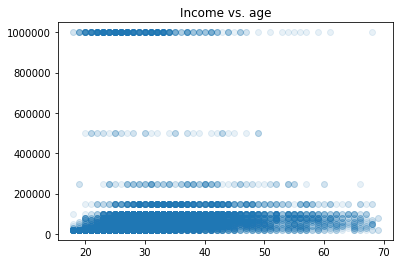

In [581]:
plt.scatter(df_q2.age, df_q2.income, alpha = 0.1)
plt.title('Income vs. age')
plt.show()

#### Preprocessing college degrees.

Let's assign scores as following

5. Highschool AND Space Camp
10. Two-year college
15. COllege / Univeristy
20. Med School AND Law School AND Masters Program
25. ph.d program

Now for different status.
-2 for drop out
+0 for working on or not disclosed
+2 for graduated

Tehrefore, if you dropped out of college / university, it's 15 - 2 = 13

In [582]:
def score_education(x):
    score = 0
    if (('high school' in x) or ('space camp' in x)):
        score = 5
    elif ('two-year' in x):
        score = 10
    elif ('college/university' in x):
        score = 15
    elif (('med school' in x ) or ('law school' in x) or ('masters') in x):
        score = 20
    elif ('ph.d' in x):
        score = 25
    
    if ('dropped out' in x):
        score -=2
    elif ('graduated from' in x):
        score +=2
    
    return score

In [583]:
df_q2['edu_score'] = df_q2.education.apply(score_education)
df_q2


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,education,job,income,edu_score
1,35,working on space camp,hospitality / travel,80000,5
3,23,working on college/university,student,20000,15
11,28,graduated from college/university,banking / financial / real estate,40000,17
13,30,graduated from high school,sales / marketing / biz dev,30000,7
14,29,working on college/university,other,50000,15
...,...,...,...,...,...
59917,26,graduated from masters program,rather not say,100000,22
59927,26,graduated from college/university,other,50000,17
59930,41,graduated from college/university,political / government,70000,17
59934,43,graduated from masters program,other,80000,22


#### On income

Since income is a categorical variable used here, let's change the values to strings.

In [584]:
df_q2['income_str'] = df_q2.income.apply(str)
print(df_q2.dtypes)
df_q2

age            int64
education     object
job           object
income         int64
edu_score      int64
income_str    object
dtype: object


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,education,job,income,edu_score,income_str
1,35,working on space camp,hospitality / travel,80000,5,80000
3,23,working on college/university,student,20000,15,20000
11,28,graduated from college/university,banking / financial / real estate,40000,17,40000
13,30,graduated from high school,sales / marketing / biz dev,30000,7,30000
14,29,working on college/university,other,50000,15,50000
...,...,...,...,...,...,...
59917,26,graduated from masters program,rather not say,100000,22,100000
59927,26,graduated from college/university,other,50000,17,50000
59930,41,graduated from college/university,political / government,70000,17,70000
59934,43,graduated from masters program,other,80000,22,80000


#### One hot encoding for Job column

Since it's categorical nominal, let's use one hot encoding to do it as practice.

In [585]:
from sklearn.preprocessing import OneHotEncoder

In [586]:
enc = OneHotEncoder(handle_unknown='ignore')

In [587]:
enc_job = pd.DataFrame(enc.fit_transform(df_q2[['job']]).toarray())
print(enc.get_feature_names(['job']))

enc_job.columns = enc.get_feature_names(['job'])
enc_job

['job_artistic / musical / writer' 'job_banking / financial / real estate'
 'job_clerical / administrative' 'job_computer / hardware / software'
 'job_construction / craftsmanship' 'job_education / academia'
 'job_entertainment / media' 'job_executive / management'
 'job_hospitality / travel' 'job_law / legal services'
 'job_medicine / health' 'job_military' 'job_other'
 'job_political / government' 'job_rather not say' 'job_retired'
 'job_sales / marketing / biz dev' 'job_science / tech / engineering'
 'job_student' 'job_transportation' 'job_unemployed']


,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,...,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalize the continuous data

Let's make sure all continuosu data is from 0 to 1. We are going to use sklearn's MinMaxScaler.

In [588]:
from sklearn.preprocessing import MinMaxScaler

In [589]:
scaler = MinMaxScaler()


In [590]:
df_q2_scaled = pd.DataFrame(scaler.fit_transform(df_q2[['age', 'edu_score']]))
df_q2_scaled.columns = ['age', 'edu_score']
df_q2_scaled

,age,edu_score
0,0.333333,0.083333
1,0.098039,0.500000
2,0.196078,0.583333
3,0.235294,0.166667
4,0.215686,0.500000
...,...,...
10531,0.156863,0.791667
10532,0.156863,0.583333
10533,0.450980,0.583333
10534,0.490196,0.791667


In [591]:
df_q2_features = df_q2_scaled.join(enc_job)
df_q2_features

,age,edu_score,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,...,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,0.333333,0.083333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.098039,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.196078,0.583333,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.215686,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531,0.156863,0.791667,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10532,0.156863,0.583333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10533,0.450980,0.583333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10534,0.490196,0.791667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [592]:
df_q2_labels = df_q2['income_str']
df_q2_labels.head()

1     80000
3     20000
11    40000
13    30000
14    50000
Name: income_str, dtype: object

### Step 4: Prediction

### Question 1: Can habits, beliefs, & preferences be used to predict someone's astrological sign?

We are goning to use two classification models and see which one is better
- KNN
- Decision Tree


#### Splitting Train Test

In [593]:
from sklearn.model_selection import train_test_split

In [594]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(q1_feature, np.ravel(q1_label), test_size = 0.2)

#### KNN

In [595]:
from sklearn.neighbors import KNeighborsClassifier

In [596]:
knn1 = KNeighborsClassifier(n_neighbors = 5)

knn1.fit(X_train1, y_train1)
print(knn1.score(X_test1, y_test1))

0.08631622008590714


In [597]:
from sklearn.metrics import classification_report

In [598]:
knn1_predictions = knn1.predict(X_test1)

In [599]:
print(classification_report(Y_test1, knn1_predictions))

              precision    recall  f1-score   support

    aquarius       0.08      0.20      0.11       778
       aries       0.09      0.16      0.11       835
      cancer       0.08      0.12      0.10       774
   capricorn       0.06      0.06      0.06       699
      gemini       0.09      0.07      0.08       866
         leo       0.06      0.04      0.05       887
       libra       0.07      0.05      0.06       847
      pisces       0.07      0.04      0.05       757
 sagittarius       0.07      0.04      0.05       770
     scorpio       0.07      0.04      0.05       830
      taurus       0.07      0.04      0.05       856
       virgo       0.07      0.04      0.05       879

    accuracy                           0.08      9778
   macro avg       0.07      0.08      0.07      9778
weighted avg       0.07      0.08      0.07      9778



From both score and classification report, we see an accuracy of about 8%. That's terrible. Let's try decision tree instead.

#### Decision Tree

In [600]:
from sklearn.tree import DecisionTreeClassifier

In [601]:
tree1 = DecisionTreeClassifier(max_depth = None)

In [602]:
tree1.fit(X_train1, Y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [603]:
tree1_predictions = tree1.predict(X_test1)

In [604]:
print(classification_report(Y_test1, tree1_predictions))

              precision    recall  f1-score   support

    aquarius       0.06      0.09      0.08       778
       aries       0.10      0.12      0.11       835
      cancer       0.08      0.10      0.09       774
   capricorn       0.07      0.08      0.08       699
      gemini       0.08      0.08      0.08       866
         leo       0.09      0.08      0.09       887
       libra       0.06      0.06      0.06       847
      pisces       0.09      0.08      0.09       757
 sagittarius       0.08      0.07      0.08       770
     scorpio       0.07      0.06      0.06       830
      taurus       0.10      0.08      0.09       856
       virgo       0.10      0.08      0.09       879

    accuracy                           0.08      9778
   macro avg       0.08      0.08      0.08      9778
weighted avg       0.08      0.08      0.08      9778



We are also yielding results of around 8% to 9%. This is a bit frustrating. Let's see if we can do something to improve prediction rate.

We have had a lot of 'not disclosed' columns. Let's drop all of those and see if it works.

#### Fixing by removing most NaN rows.

In [605]:
new_df = profiles[habits_beliefs_preferences + ['sign']][:]
#new_df.diet.fillna('anything', inplace = True)
new_df.drop(columns = ['speaks'], inplace = True)
new_df = new_df.dropna()
print(len(new_df))

new_df['religion_cleaned'] = new_df.religion.apply(lambda x:\
                                            x.split()[0] if x != 'not disclosed' else x)

new_df['sign_cleaned'] = new_df.sign.apply(lambda x: x.split()[0])

print(new_df.sign_cleaned.unique())
      
new_df.drop(columns = ['religion', 'sign'], inplace = True)

new_df

7802
['gemini' 'cancer' 'sagittarius' 'taurus' 'pisces' 'aquarius' 'libra'
 'aries' 'capricorn' 'virgo' 'leo' 'scorpio']


,diet,drinks,drugs,job,offspring,pets,smokes,religion_cleaned,sign_cleaned
0,strictly anything,socially,never,transportation,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,sometimes,agnosticism,gemini
1,mostly other,often,sometimes,hospitality / travel,"doesn&rsquo;t have kids, but might want them",likes dogs and likes cats,no,agnosticism,cancer
7,mostly anything,socially,never,artistic / musical / writer,"doesn&rsquo;t have kids, but wants them",likes dogs and likes cats,no,christianity,sagittarius
14,mostly anything,socially,never,other,"doesn&rsquo;t have kids, but wants them",likes dogs and has cats,no,catholicism,taurus
19,mostly anything,socially,never,science / tech / engineering,doesn&rsquo;t have kids,likes dogs and likes cats,no,catholicism,pisces
...,...,...,...,...,...,...,...,...,...
59907,anything,socially,sometimes,artistic / musical / writer,doesn&rsquo;t have kids,likes dogs,sometimes,atheism,taurus
59913,mostly anything,socially,never,executive / management,doesn&rsquo;t have kids,likes dogs and likes cats,no,agnosticism,libra
59920,mostly anything,socially,sometimes,science / tech / engineering,doesn&rsquo;t have kids,likes dogs and likes cats,no,agnosticism,sagittarius
59942,mostly anything,often,sometimes,entertainment / media,doesn&rsquo;t have kids,likes dogs and likes cats,no,agnosticism,leo


In [606]:
cols = ['diet', 'drinks', 'drugs', 'job', 'offspring', 'pets', 'religion_cleaned', 'smokes']
q1_label_rev = new_df['sign_cleaned']
q1_feature_rev = new_df.drop(columns = 'sign_cleaned')

for col in cols:
    q1_feature_rev = pd.get_dummies(q1_feature_rev, columns = [col], prefix = [col])
print(q1_feature_rev.columns.tolist())
print(len(q1_label_rev))
print(len(q1_feature_rev))
q1_label_rev.head()

['diet_anything', 'diet_kosher', 'diet_mostly anything', 'diet_mostly halal', 'diet_mostly kosher', 'diet_mostly other', 'diet_mostly vegan', 'diet_mostly vegetarian', 'diet_other', 'diet_strictly anything', 'diet_strictly halal', 'diet_strictly kosher', 'diet_strictly other', 'diet_strictly vegan', 'diet_strictly vegetarian', 'diet_vegan', 'diet_vegetarian', 'drinks_desperately', 'drinks_not at all', 'drinks_often', 'drinks_rarely', 'drinks_socially', 'drinks_very often', 'drugs_never', 'drugs_often', 'drugs_sometimes', 'job_artistic / musical / writer', 'job_banking / financial / real estate', 'job_clerical / administrative', 'job_computer / hardware / software', 'job_construction / craftsmanship', 'job_education / academia', 'job_entertainment / media', 'job_executive / management', 'job_hospitality / travel', 'job_law / legal services', 'job_medicine / health', 'job_military', 'job_other', 'job_political / government', 'job_rather not say', 'job_retired', 'job_sales / marketing / b

0          gemini
1          cancer
7     sagittarius
14         taurus
19         pisces
Name: sign_cleaned, dtype: object

In [607]:
X_train2, X_test2, y_train2, y_test2 = \
    train_test_split(q1_feature_rev, q1_label_rev, test_size = 0.2)

In [608]:
tree2 = DecisionTreeClassifier(max_depth = None)

In [609]:
tree2.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [610]:
tree2_predictions = tree2.predict(X_test2)

In [611]:
print(classification_report(y_test2, tree2_predictions))

              precision    recall  f1-score   support

    aquarius       0.08      0.09      0.08       111
       aries       0.09      0.08      0.08       140
      cancer       0.10      0.10      0.10       143
   capricorn       0.07      0.08      0.08       111
      gemini       0.12      0.11      0.11       141
         leo       0.14      0.14      0.14       155
       libra       0.05      0.06      0.06       119
      pisces       0.07      0.06      0.06       131
 sagittarius       0.06      0.06      0.06       121
     scorpio       0.15      0.15      0.15       131
      taurus       0.03      0.03      0.03       132
       virgo       0.07      0.08      0.07       126

    accuracy                           0.09      1561
   macro avg       0.09      0.09      0.09      1561
weighted avg       0.09      0.09      0.09      1561



In [612]:
from sklearn.ensemble import RandomForestClassifier

In [613]:
forest = RandomForestClassifier()

In [614]:
forest.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [615]:
forest_predictions = forest.predict(X_test2)

In [676]:
print(classification_report(y_test2, forest_predictions))

              precision    recall  f1-score   support

    aquarius       0.10      0.09      0.10       111
       aries       0.07      0.06      0.06       140
      cancer       0.09      0.10      0.10       143
   capricorn       0.05      0.05      0.05       111
      gemini       0.08      0.09      0.08       141
         leo       0.09      0.09      0.09       155
       libra       0.08      0.09      0.09       119
      pisces       0.09      0.08      0.09       131
 sagittarius       0.07      0.07      0.07       121
     scorpio       0.12      0.11      0.11       131
      taurus       0.06      0.05      0.05       132
       virgo       0.09      0.10      0.09       126

    accuracy                           0.08      1561
   macro avg       0.08      0.08      0.08      1561
weighted avg       0.08      0.08      0.08      1561



#### One last desperate attempt

Let's try to group the zodiac signs, as how we had done with the income brackets in Question 2.

In [685]:
q1_label_rev

0             gemini
1             cancer
7        sagittarius
14            taurus
19            pisces
            ...     
59907         taurus
59913          libra
59920    sagittarius
59942            leo
59944            leo
Name: sign_cleaned, Length: 7802, dtype: object

In [690]:
def sign_group(x):
    if (x in ['aries', 'leo', 'sagittarius']):
        return 'Fire'
    elif (x in ['taurus', 'virgo', 'capricorn']):
        return 'Earth'
    elif (x in ['gemini', 'libra', 'aquarius']):
        return 'Air'
    elif (x in ['cancer', 'scorpio', 'pisces']):
        return 'Water'
q1_label_group = q1_label_rev.apply(sign_group)
print(q1_label_group.value_counts())
q1_label_group

Water    1991
Fire     1977
Air      1932
Earth    1902
Name: sign_cleaned, dtype: int64


0          Air
1        Water
7         Fire
14       Earth
19       Water
         ...  
59907    Earth
59913      Air
59920     Fire
59942     Fire
59944     Fire
Name: sign_cleaned, Length: 7802, dtype: object

In [694]:
X_train1_2, X_test1_2, y_train1_2, y_test1_2 = train_test_split(q1_feature_rev, q1_label_group, test_size = 0.2)

In [695]:
forest6 = RandomForestClassifier()

In [699]:
forest6.fit(X_train1_2, y_train1_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [701]:
forest6_predict = forest6.predict(X_test1_2)

In [702]:
print(classification_report(y_test1_2, forest6_predict))

              precision    recall  f1-score   support

         Air       0.26      0.27      0.27       391
       Earth       0.24      0.25      0.24       351
        Fire       0.29      0.27      0.28       411
       Water       0.28      0.27      0.27       408

    accuracy                           0.27      1561
   macro avg       0.27      0.27      0.27      1561
weighted avg       0.27      0.27      0.27      1561



#### Analysis of Question 1 Predictions

We have tried KNN and decision tree, and we have tried to add the `job` column to the `habits, beliefs & prefrences` features. In all the cases, we have a prediction rate not much better than random guessing.

Perhaps we could get a better model by adding in appearance related information, but that would not make logical sense since appearance is not related to astrology anyhow. That would create an overfitted model that defeats our original purpose.

Therefore, my conclusion here is that we cannot predict zodiac signs from lifestyle. It's highly likely that there's no correlation between the two.

### Question 2: Can education and location be used to predict income?

We are going to use random forest to predict. Remember that we are predicting `income` from `job`, `education`, and `age`

We have dataframes `df_q2_features` and `df_q2_labels`

In [617]:
df_q2_features.head()

,age,edu_score,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,...,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,0.333333,0.083333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.098039,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.196078,0.583333,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.215686,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [618]:
df_q2_labels.head()

1     80000
3     20000
11    40000
13    30000
14    50000
Name: income_str, dtype: object

In [620]:
X_train3, X_test3, y_train3, y_test3 = train_test_split\
                (df_q2_features, df_q2_labels, test_size = 0.2)

In [621]:
forest3 = RandomForestClassifier()

In [622]:
forest3.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [623]:
forest3_predict = forest3.predict(X_test3)

In [624]:
print(classification_report(y_test3, forest3_predict))

              precision    recall  f1-score   support

      100000       0.30      0.46      0.37       277
     1000000       0.13      0.08      0.10        92
      150000       0.19      0.13      0.15       126
       20000       0.56      0.67      0.61       547
      250000       0.07      0.05      0.05        22
       30000       0.12      0.08      0.10       196
       40000       0.11      0.12      0.12       188
       50000       0.09      0.06      0.07       177
      500000       0.00      0.00      0.00        10
       60000       0.09      0.08      0.09       133
       70000       0.11      0.08      0.09       147
       80000       0.14      0.15      0.14       193

    accuracy                           0.29      2108
   macro avg       0.16      0.16      0.16      2108
weighted avg       0.26      0.29      0.27      2108



This score is a little disappointing. Let's try to remove the 'job' columns from feature. Maybe that will give us a bit more clue.

In [625]:
df_q2_features_2 = df_q2_features[['age', 'edu_score']]
df_q2_features_2

,age,edu_score
0,0.333333,0.083333
1,0.098039,0.500000
2,0.196078,0.583333
3,0.235294,0.166667
4,0.215686,0.500000
...,...,...
10531,0.156863,0.791667
10532,0.156863,0.583333
10533,0.450980,0.583333
10534,0.490196,0.791667


In [626]:
X_train4, X_test4, y_train4, y_test4 = \
        train_test_split(df_q2_features_2, df_q2_labels, test_size = 0.2)

In [627]:
forest4 = RandomForestClassifier()

In [628]:
forest4.fit(X_train4, y_train4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [629]:
forest4_predict = forest4.predict(X_test4)

In [630]:
print(classification_report(y_test4, forest4_predict))

              precision    recall  f1-score   support

      100000       0.25      0.61      0.36       319
     1000000       0.26      0.06      0.09        90
      150000       0.15      0.08      0.10       119
       20000       0.46      0.79      0.58       530
      250000       0.00      0.00      0.00        17
       30000       0.12      0.04      0.06       189
       40000       0.16      0.04      0.07       195
       50000       0.18      0.08      0.11       169
      500000       0.00      0.00      0.00         7
       60000       0.00      0.00      0.00       126
       70000       0.13      0.02      0.04       124
       80000       0.10      0.05      0.07       223

    accuracy                           0.32      2108
   macro avg       0.15      0.15      0.12      2108
weighted avg       0.23      0.32      0.24      2108



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This is roughly similar.

Let's try a KNN model.

In [632]:
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train4, y_train4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [633]:
knn2_predict = knn2.predict(X_test4)

In [634]:
print(classification_report(y_test4, knn2_predict))

              precision    recall  f1-score   support

      100000       0.23      0.44      0.30       319
     1000000       0.14      0.09      0.11        90
      150000       0.13      0.13      0.13       119
       20000       0.49      0.63      0.55       530
      250000       0.00      0.00      0.00        17
       30000       0.13      0.17      0.15       189
       40000       0.11      0.06      0.08       195
       50000       0.11      0.03      0.05       169
      500000       0.00      0.00      0.00         7
       60000       0.09      0.02      0.04       126
       70000       0.10      0.06      0.07       124
       80000       0.10      0.05      0.07       223

    accuracy                           0.27      2108
   macro avg       0.13      0.14      0.13      2108
weighted avg       0.22      0.27      0.23      2108



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Still roughly similar.

Lastly let's try to reduce the categories of the `income` to 3 major categories, and see if predictions improve.

In [646]:
print(df_q2_labels.unique())
df_q2_labels

['80000' '20000' '40000' '30000' '50000' '60000' '1000000' '150000'
 '100000' '500000' '70000' '250000']


1         80000
3         20000
11        40000
13        30000
14        50000
          ...  
59917    100000
59927     50000
59930     70000
59934     80000
59943    100000
Name: income_str, Length: 10536, dtype: object

In [652]:
def find_income_label(x):
    if (x <= 50000):
        return '<=50000'
    elif (x <= 100000):
        return '<= 100000'
    else:
        return '> 100000'
    
df_q2_labels_grouped = df_q2.income.apply(find_income_label)
print(df_q2_labels_grouped.unique())
df_q2_labels_grouped

['<= 100000' '<=50000' '> 100000']


1        <= 100000
3          <=50000
11         <=50000
13         <=50000
14         <=50000
           ...    
59917    <= 100000
59927      <=50000
59930    <= 100000
59934    <= 100000
59943    <= 100000
Name: income, Length: 10536, dtype: object

Let's classify those again, with all features.

In [657]:
X_train5, X_test5, y_train5, y_test5 = train_test_split\
            (df_q2_features, df_q2_labels_grouped, test_size = 0.2)

In [661]:
forest5 = RandomForestClassifier()
forest5.fit(X_train5, y_train5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [662]:
forest5_predict = forest5.predict(X_test5)

In [675]:
print(classification_report(y_test5, forest5_predict))
print(df_q2_labels_grouped.value_counts() / len(df_q2_labels_grouped))

              precision    recall  f1-score   support

   <= 100000       0.57      0.63      0.60       759
     <=50000       0.72      0.77      0.75      1079
    > 100000       0.32      0.12      0.18       270

    accuracy                           0.64      2108
   macro avg       0.54      0.51      0.51      2108
weighted avg       0.61      0.64      0.62      2108

<=50000      0.520501
<= 100000    0.364370
> 100000     0.115129
Name: income, dtype: float64


After grouping income into 3 major categories. Most of those have gone above random guessing. We see the accuracy rate going up a lot than the natural proportion distribution.

## Conclusion

### 1. Can habits, beliefs, & preferences be used to predict someone's astrological sign?

- Our features include `diet`, `drinks`, `drugs`, `offspring`, `pets`, `religion`, `smokes`, and `job` sometimes
- Whether including job as part of lifestyle or not, we cannot reach a prediction significantly better than random guess.
- Even by reducing categories of astrological signs, we see no improvements.
- This shows that most likely, astrological sign has no correlation with one's lifestyle.

### 2. Can education and location be used to predict income?
- Our features include `age`, `education`, and sometimes `job`
- While initially using approx 10 income brackets, it is difficult to reach an accurate prediction.
- After reducing income brackets to 3 major ones, we can attain a precision significantly better than random guess to proportion.